# 1. Business Understanding

## This is a classification problem because from the bank customer data we need to predict whether the customer will subscribe a term deposit (Yes/No)

There has been a revenue decline for the StirBank bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the StirBank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing effort on such clients.

We will use data mining to find the best strategies to improve the next marketing campaign. In order to answer this, we have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies. To resolve the problem, we suggest a classification approach to predict which clients are more likely to subscribe for term deposits.

# 2. Data Summary

## Import libraries

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [234]:
df = pd.read_csv('Data/bank-tr.csv')

In [235]:
df.head(10)

,accountID,town,country,age,job,marital,education,defaulted?,current_balance,housing,has_loan,last_contact,cc_tr,last_contact_day,last_contact_month,campaign,days_since_last_contact,previous,poutcome,made_deposit
0,24634684,Crawley,UK,39,management,married,tertiary,no,-190,no,yes,unknown,1,11,jun,8,-1,0,unknown,yes
1,80795929,Southend-on-Sea,UK,53,housemaid,married,primary,no,362,no,no,cellular,1,28,jul,2,-1,0,unknown,yes
2,30786087,Gillingham,UK,79,retired,divorced,primary,no,2787,no,no,telephone,5,13,jul,1,377,1,success,yes
3,38925327,Gateshead,UK,43,services,single,secondary,no,550,yes,no,cellular,4,13,may,2,-1,0,unknown,no
4,30560733,Eastbourne,UK,35,technician,single,secondary,no,344,no,no,cellular,2,27,aug,16,-1,0,unknown,yes
5,87009742,Cambridge,UK,24,student,single,secondary,no,139,no,no,cellular,1,9,sep,4,-1,0,unknown,yes
6,64060643,Eastbourne,UK,49,blue-collar,divorced,primary,no,24,yes,no,cellular,5,11,may,1,362,1,success,yes
7,64609858,London,UK,54,self-employed,single,tertiary,no,384,no,yes,cellular,4,27,may,1,-1,0,unknown,yes
8,69018404,Colchester,UK,29,services,married,primary,no,-102,no,no,unknown,4,4,jul,1,-1,0,unknown,no
9,65740222,Bristol,UK,56,blue-collar,single,secondary,no,1187,yes,no,cellular,2,5,feb,2,-1,0,unknown,no


In [236]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   accountID                8000 non-null   int64 
 1   town                     8000 non-null   object
 2   country                  8000 non-null   object
 3   age                      8000 non-null   int64 
 4   job                      8000 non-null   object
 5   marital                  8000 non-null   object
 6   education                8000 non-null   object
 7   defaulted?               8000 non-null   object
 8   current_balance          8000 non-null   int64 
 9   housing                  8000 non-null   object
 10  has_loan                 8000 non-null   object
 11  last_contact             8000 non-null   object
 12  cc_tr                    8000 non-null   int64 
 13  last_contact_day         8000 non-null   int64 
 14  last_contact_month       8000 non-null  

## A total of 8000 rows and 20 columns of data are defined as follows:

## Feature/column description

### Basic Attributes

1.  accountID              : unique identifier for customer
2.  town                   : home town for customer
3.  country                : country for customer's home address
4.  age                    : customer's age
5.  job                    : customer's job
6.  married                : customer's marital status
7.  education              : customer's highest educational qualification level obtained
8.  defaulted?             : has the customer credit in default (i.e. failed to repay)?
9.  current_balance        : current amount in customer's account in pounds
10. housing                : has the customer a housing loan / mortgage?
11. has_loan               : has the customer got an unsecured personal loan?

### Business Contact
12. last_contact           : type of communication used for previous call to customer
13. cc_tr                  : credit card tracking ID (meaning is confidential)
14. last_contact_month     : last contact month of year
15. last_contact_day       : last contact day of the month

### Marketing Activities
16. campaign               : number of contacts performed during this campaign and for this client
17. days_since_last_contact: number of days that passed by after the client was last contacted from a previous campaign
18. previous               : number of contacts performed before this campaign and for this client
19. poutcome               : outcome of the previous marketing campaign

### Target Variable
20. made_deposit           : has the client subscribed a term deposit?

## EDA

In [237]:
df.dtypes

accountID                   int64
town                       object
country                    object
age                         int64
job                        object
marital                    object
education                  object
defaulted?                 object
current_balance             int64
housing                    object
has_loan                   object
last_contact               object
cc_tr                       int64
last_contact_day            int64
last_contact_month         object
campaign                    int64
days_since_last_contact     int64
previous                    int64
poutcome                   object
made_deposit               object
dtype: object

In [238]:
# Ordinal: maintain a specific order (use label encoder)
# Nomonal: do not maintain a specific order (go for one hot encoding)
# Discrete: Numbered values that take only certain value
# Contineous: Numbered values that can take any value within a specific range

In [239]:
## Categorical features

cat_features = [col for col in df.columns if df[col].dtype =='O']
print(cat_features)
print(len(cat_features))

['town', 'country', 'job', 'marital', 'education', 'defaulted?', 'housing', 'has_loan', 'last_contact', 'last_contact_month', 'poutcome', 'made_deposit']
12


In [240]:
## Numerical features

num_features = [col for col in df.columns if df[col].dtype !='O']
print(num_features)
print(len(num_features))

['accountID', 'age', 'current_balance', 'cc_tr', 'last_contact_day', 'campaign', 'days_since_last_contact', 'previous']
8


In [241]:
for col in cat_features:
    print(col)
    print(df[col].unique())
    print(df[col].dtype, '\n')

town
['Crawley' 'Southend-on-Sea' 'Gillingham' 'Gateshead' 'Eastbourne'
 'Cambridge' 'London' 'Colchester' 'Bristol' 'Newport'
 'Kingston upon Hull' 'Southampton' 'Liverpool' 'Telford' 'Slough'
 'Glasgow' 'Birmingham' 'Dundee' 'Stoke-on-Trent' 'Nottingham' 'Swindon'
 'Manchester' 'Blackburn' 'Reading' 'Plymouth' 'Warrington' 'Derby'
 'Peterborough' 'Birkenhead' 'Chesterfield' 'County Down' 'Portsmouth'
 'Poole' 'Rotherham' 'Raleigh' 'Doncaster' 'Luton' 'Solihull' 'Bedford'
 'St Albans' 'Norwich' 'Leeds' 'Maidstone' 'Oxford' 'Worthing' 'Belfast'
 'Sunderland' 'Wolverhampton' 'Bath' 'Basingstoke' 'Newcastle upon Tyne'
 'Watford' 'Stockport' 'Hartlepool' 'Preston' 'Milton Keynes' 'Southport'
 'Brighton' 'Cheltenham' 'High Wycombe' 'Hemel Hempstead' 'Huddersfield'
 'Barnsley' 'Darlington' 'Rochdale' 'Leicester' 'Wigan' 'St Helens'
 'Sheffield' 'Worcester' 'Coventry' 'Sale' 'Woking' 'Oldham' 'Northampton'
 'Chelmsford' 'Stevenage' 'Aberdeen' 'Bolton' 'York' 'Basildon' 'Ipswich'
 'Nuneaton' 

In [242]:
for col in num_features:
    print(col)
    print(df[col].unique())
    print(df[col].dtype, '\n')

accountID
[24634684 80795929 30786087 ... 15543615 95937004 72139097]
int64 

age
[39 53 79 43 35 24 49 54 29 56 47 33 41 44 32 42 66 37 34 55 50 48 36 40
 38 27 58 18 30 59 28 31 26 51 46 57 75 65 73 78 25 69 45 76 60 22 52 62
 72 61 63 23 70 68 20 67 71 83 64 77 81 80 21 19 85 86 84 74 87 90 88 89
 82 93 92]
int64 

current_balance
[-190  362 2787 ... 3902  875 1868]
int64 

cc_tr
[1 5 4 2 3]
int64 

last_contact_day
[11 28 13 27  9  4  5 19 29 14  7 25 12 20  6  2 15  8 30  3 21 18 23 22
 16 17 31  1 26 10 24]
int64 

campaign
[ 8  2  1 16  4  3  7 20 12  5 15  9 11  6 13 21 10 24 18 17 14 26 22 41
 30 23 25 29 43 19 31 63 32 33 28 27]
int64 

days_since_last_contact
[ -1 377 362  99 392 150 337 357 167 164 182  93 121  95 188 365 186 101
 238 805 183 189  89 412 103 251 100 415 344 370  98 174 190  86 321 503
  28  91 181 160  90 227  42 404 172 318 179 381 123 398 334 477 276 345
  94 440 349 113  92 360 305  84 363 295   9 264 425 129 111 168  70 191
 242 196 315 772 184 156 239 

<Figure size 432x288 with 0 Axes>

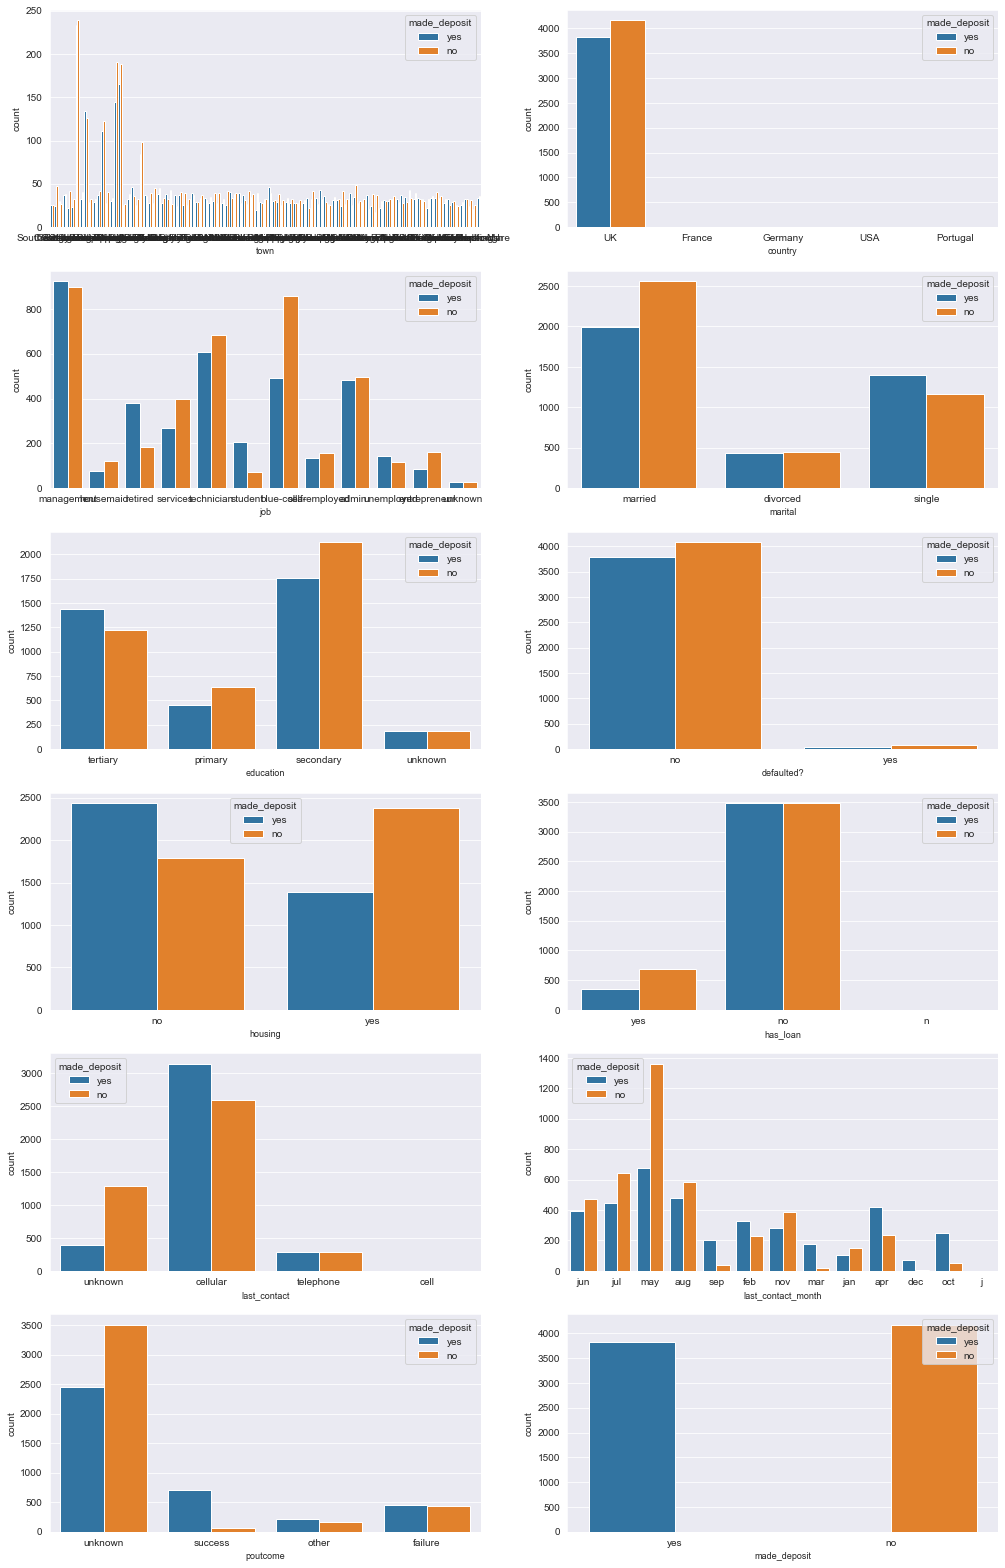

In [243]:
## Visulaize categorical features with made_deposit
plt.figure()
i = 1
fig, ax = plt.subplots(6, 2, figsize = (17, 28))

for col in cat_features:
    plt.subplot(6,2, i)
    sns.countplot(data = df, x = col, hue = 'made_deposit')
    plt.xlabel(col, fontsize = 9)
    i = i+1
plt.show()

In [244]:
print(df['country'].value_counts())

UK          7995
France         2
USA            1
Portugal       1
Germany        1
Name: country, dtype: int64


In [245]:
print(df['made_deposit'].value_counts())

no     4172
yes    3828
Name: made_deposit, dtype: int64


<Figure size 432x288 with 0 Axes>

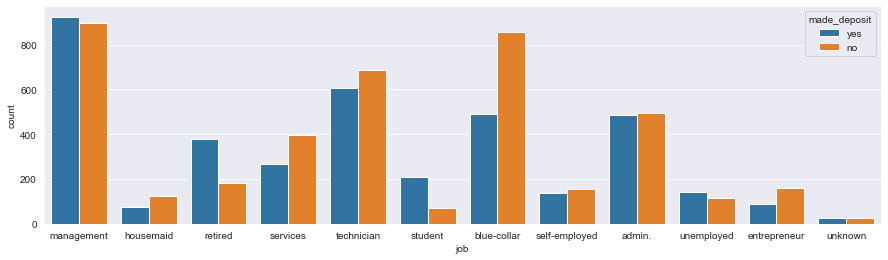

In [246]:
plt.figure()
fig, ax = plt.subplots(figsize = (15, 4))
sns.countplot(data = df, x = 'job', hue = 'made_deposit')
plt.show()

<Figure size 432x288 with 0 Axes>

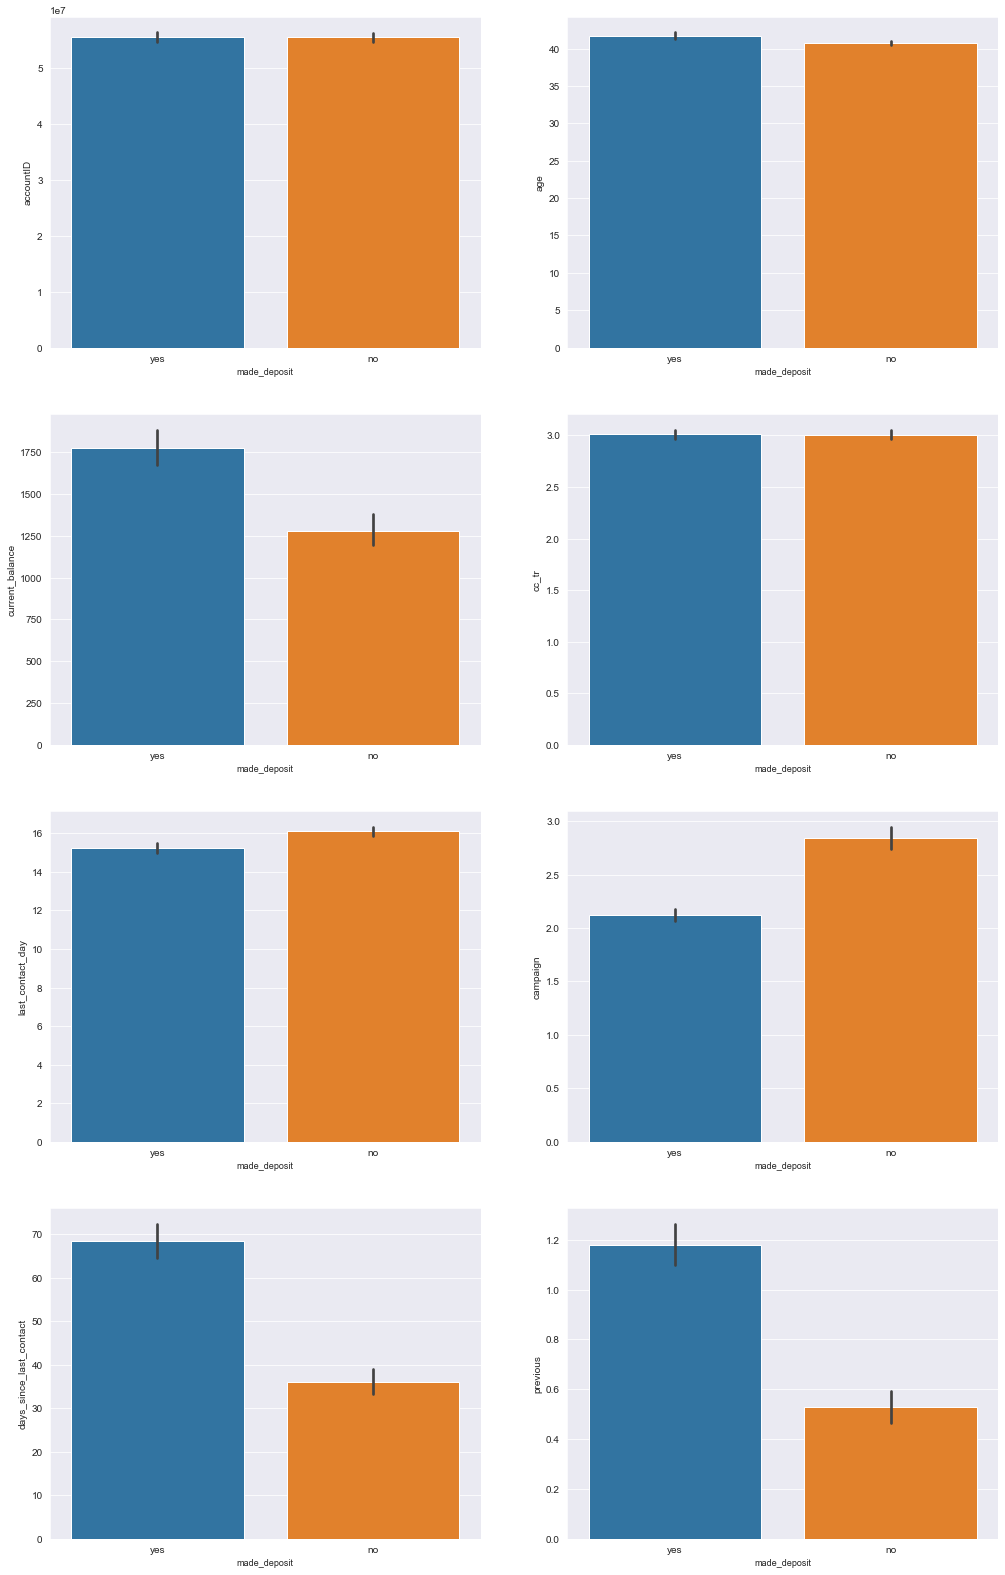

In [247]:
## Visulaize numerical features with made_deposit
plt.figure()
i = 1
fig, ax = plt.subplots(6, 2, figsize = (17, 28))

for col in num_features:
    plt.subplot(4,2, i)
    sns.barplot(x = df['made_deposit'], y =df[col])
    plt.xlabel('made_deposit', fontsize = 9)
    i = i+1
plt.show()

<Figure size 432x288 with 0 Axes>

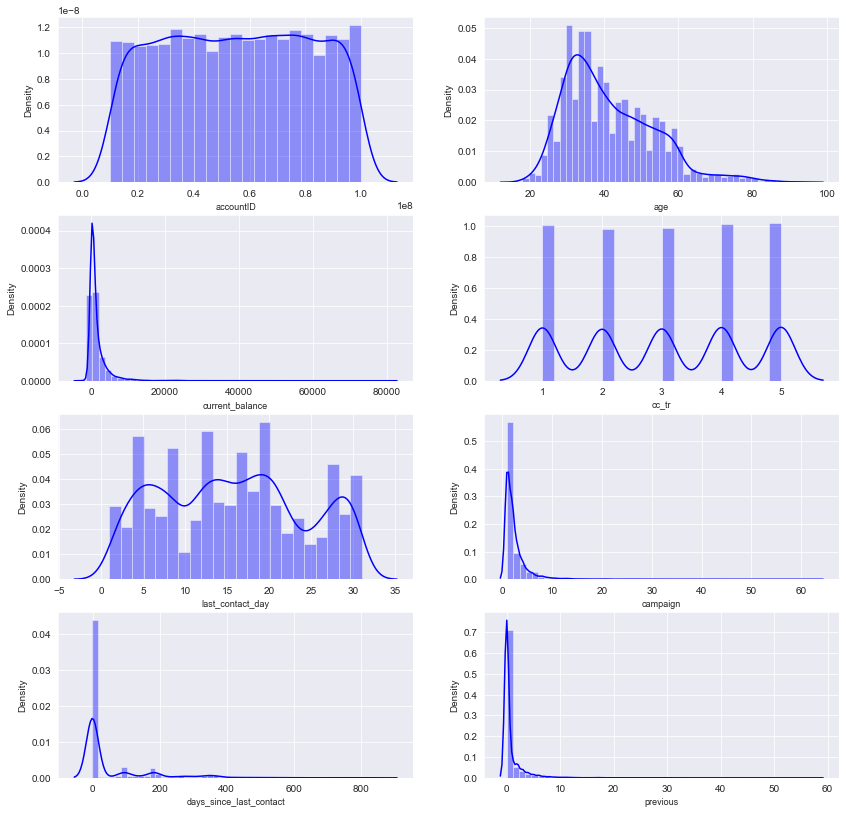

In [248]:
## Check distribution of numerical features
i=1
plt.figure()
#plt.style.use('default')
fig, ax = plt.subplots(4, 2, figsize = (14, 14))

for feature in num_features:
    plt.subplot(4,2,i)
    sns.distplot(df[feature], color = 'blue', kde = True, label = 'bank')
    plt.xlabel(feature, fontsize = 9);
    i=i+1
plt.show()

In [249]:
df.head()

,accountID,town,country,age,job,marital,education,defaulted?,current_balance,housing,has_loan,last_contact,cc_tr,last_contact_day,last_contact_month,campaign,days_since_last_contact,previous,poutcome,made_deposit
0,24634684,Crawley,UK,39,management,married,tertiary,no,-190,no,yes,unknown,1,11,jun,8,-1,0,unknown,yes
1,80795929,Southend-on-Sea,UK,53,housemaid,married,primary,no,362,no,no,cellular,1,28,jul,2,-1,0,unknown,yes
2,30786087,Gillingham,UK,79,retired,divorced,primary,no,2787,no,no,telephone,5,13,jul,1,377,1,success,yes
3,38925327,Gateshead,UK,43,services,single,secondary,no,550,yes,no,cellular,4,13,may,2,-1,0,unknown,no
4,30560733,Eastbourne,UK,35,technician,single,secondary,no,344,no,no,cellular,2,27,aug,16,-1,0,unknown,yes


In [250]:
## Drop unimportant features
df2 = df.drop(columns = ['accountID', 'country', 'cc_tr'], axis =1)

In [251]:
df2.head()

,town,age,job,marital,education,defaulted?,current_balance,housing,has_loan,last_contact,last_contact_day,last_contact_month,campaign,days_since_last_contact,previous,poutcome,made_deposit
0,Crawley,39,management,married,tertiary,no,-190,no,yes,unknown,11,jun,8,-1,0,unknown,yes
1,Southend-on-Sea,53,housemaid,married,primary,no,362,no,no,cellular,28,jul,2,-1,0,unknown,yes
2,Gillingham,79,retired,divorced,primary,no,2787,no,no,telephone,13,jul,1,377,1,success,yes
3,Gateshead,43,services,single,secondary,no,550,yes,no,cellular,13,may,2,-1,0,unknown,no
4,Eastbourne,35,technician,single,secondary,no,344,no,no,cellular,27,aug,16,-1,0,unknown,yes


# 3. Data Preperation

## 3.1 Correct mistyped or corrupted enteries

In [252]:
df2.nunique()

town                        101
age                          75
job                          12
marital                       3
education                     4
defaulted?                    2
current_balance            3208
housing                       2
has_loan                      3
last_contact                  4
last_contact_day             31
last_contact_month           13
campaign                     36
days_since_last_contact     434
previous                     33
poutcome                      4
made_deposit                  2
dtype: int64

In [253]:
print(df2['has_loan'].unique())

['yes' 'no' 'n']


In [254]:
df2['has_loan']= df2['has_loan'].replace(['n'], 'no')
df2['last_contact_month'] = df2['last_contact_month'].replace(['j'], 'jun')

In [255]:
df2.nunique()

town                        101
age                          75
job                          12
marital                       3
education                     4
defaulted?                    2
current_balance            3208
housing                       2
has_loan                      2
last_contact                  4
last_contact_day             31
last_contact_month           12
campaign                     36
days_since_last_contact     434
previous                     33
poutcome                      4
made_deposit                  2
dtype: int64

## 3.2 Handle Missing Data

In [256]:
df2.isnull().sum()

town                       0
age                        0
job                        0
marital                    0
education                  0
defaulted?                 0
current_balance            0
housing                    0
has_loan                   0
last_contact               0
last_contact_day           0
last_contact_month         0
campaign                   0
days_since_last_contact    0
previous                   0
poutcome                   0
made_deposit               0
dtype: int64

<AxesSubplot:>

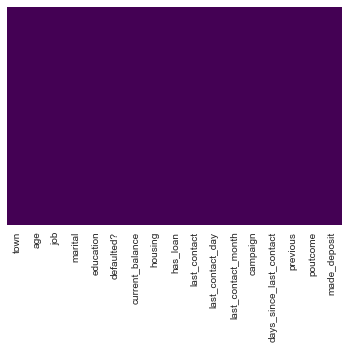

In [257]:
sns.heatmap(df2.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

## 3.3 Check Correlation of features

<AxesSubplot:>

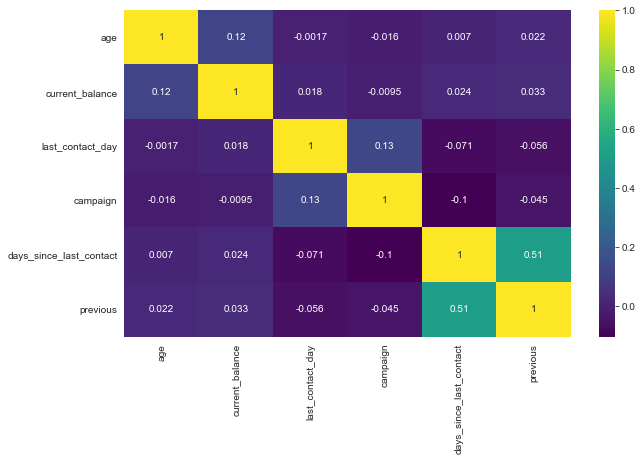

In [258]:
plt.subplots(figsize = (10,6))
corr = df2.corr()
sns.heatmap(corr, annot=True, cmap = 'viridis')

In [259]:
df2.head()

,town,age,job,marital,education,defaulted?,current_balance,housing,has_loan,last_contact,last_contact_day,last_contact_month,campaign,days_since_last_contact,previous,poutcome,made_deposit
0,Crawley,39,management,married,tertiary,no,-190,no,yes,unknown,11,jun,8,-1,0,unknown,yes
1,Southend-on-Sea,53,housemaid,married,primary,no,362,no,no,cellular,28,jul,2,-1,0,unknown,yes
2,Gillingham,79,retired,divorced,primary,no,2787,no,no,telephone,13,jul,1,377,1,success,yes
3,Gateshead,43,services,single,secondary,no,550,yes,no,cellular,13,may,2,-1,0,unknown,no
4,Eastbourne,35,technician,single,secondary,no,344,no,no,cellular,27,aug,16,-1,0,unknown,yes


## 3.4 We use LabelEncoder to encode binaray categorical features

In [260]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['defaulted?'] = le.fit_transform(df2['defaulted?'])
df2['housing'] = le.fit_transform(df2['housing'])
df2['has_loan'] = le.fit_transform(df2['has_loan'])
df2['made_deposit'] = le.fit_transform(df2['made_deposit'])

In [261]:
df2.head()

,town,age,job,marital,education,defaulted?,current_balance,housing,has_loan,last_contact,last_contact_day,last_contact_month,campaign,days_since_last_contact,previous,poutcome,made_deposit
0,Crawley,39,management,married,tertiary,0,-190,0,1,unknown,11,jun,8,-1,0,unknown,1
1,Southend-on-Sea,53,housemaid,married,primary,0,362,0,0,cellular,28,jul,2,-1,0,unknown,1
2,Gillingham,79,retired,divorced,primary,0,2787,0,0,telephone,13,jul,1,377,1,success,1
3,Gateshead,43,services,single,secondary,0,550,1,0,cellular,13,may,2,-1,0,unknown,0
4,Eastbourne,35,technician,single,secondary,0,344,0,0,cellular,27,aug,16,-1,0,unknown,1


## 3.5 Encode Other categorical features with more than one types (OneHot Encoding)

In [262]:
town_enc = pd.get_dummies(df2['town'], drop_first=True)
job_enc = pd.get_dummies(df2['job'], drop_first=True)
marital_enc = pd.get_dummies(df2['marital'], drop_first=True)
education_enc = pd.get_dummies(df2['education'], drop_first=True)
last_contact_enc = pd.get_dummies(df2['last_contact'], drop_first=True)
last_contact_month_enc = pd.get_dummies(df2['last_contact_month'], drop_first=True)
poutcome_enc = pd.get_dummies(df2['poutcome'], drop_first=True)

In [263]:
df2.drop(['town', 'job', 'marital', 'education', 'last_contact', 'last_contact_month','poutcome'], axis = 1, inplace = True)

In [264]:
df2.head()

,age,defaulted?,current_balance,housing,has_loan,last_contact_day,campaign,days_since_last_contact,previous,made_deposit
0,39,0,-190,0,1,11,8,-1,0,1
1,53,0,362,0,0,28,2,-1,0,1
2,79,0,2787,0,0,13,1,377,1,1
3,43,0,550,1,0,13,2,-1,0,0
4,35,0,344,0,0,27,16,-1,0,1


In [265]:
df2 = pd.concat([df2, town_enc, job_enc, marital_enc, education_enc, last_contact_enc, last_contact_month_enc, poutcome_enc], axis = 1)

In [266]:
df2.head()

,age,defaulted?,current_balance,housing,has_loan,last_contact_day,campaign,days_since_last_contact,previous,made_deposit,Barnsley,Basildon,Basingstoke,Bath,Bedford,Belfast,Birkenhead,Birmingham,Blackburn,Blackpool,...,secondary,tertiary,unknown,cellular,telephone,unknown,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,other,success,unknown
0,39,0,-190,0,1,11,8,-1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,53,0,362,0,0,28,2,-1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,79,0,2787,0,0,13,1,377,1,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,43,0,550,1,0,13,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,35,0,344,0,0,27,16,-1,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [267]:
pd.set_option('display.max_columns',40)
df2.head()

,age,defaulted?,current_balance,housing,has_loan,last_contact_day,campaign,days_since_last_contact,previous,made_deposit,Barnsley,Basildon,Basingstoke,Bath,Bedford,Belfast,Birkenhead,Birmingham,Blackburn,Blackpool,...,secondary,tertiary,unknown,cellular,telephone,unknown,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,other,success,unknown
0,39,0,-190,0,1,11,8,-1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,53,0,362,0,0,28,2,-1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,79,0,2787,0,0,13,1,377,1,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,43,0,550,1,0,13,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,35,0,344,0,0,27,16,-1,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [268]:
df2 = df2.drop_duplicates() # drop duplicate column

## 3.6 Split the data into training set and test set

In [269]:
## Separate independent and dependent variables

X = df2.drop('made_deposit', axis = 1)
y = df2['made_deposit']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [270]:
print(y_train.shape)
print(y_test.shape)

(5600,)
(2400,)


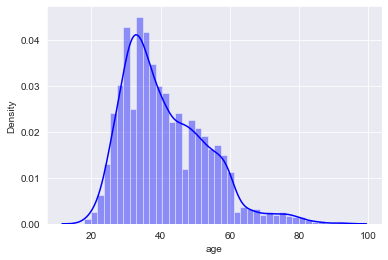

In [271]:
sns.set_style("darkgrid")
plt.figure() 
sns.distplot(X_train['age'], color = 'blue', kde = True, label = 'bank')
plt.show()

## 3.7 Scaling of the Data

In [272]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [273]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

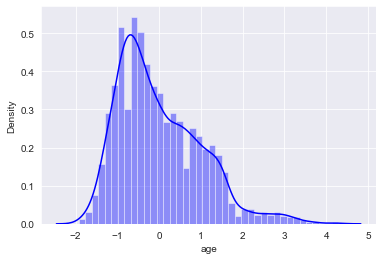

In [274]:
sns.set_style("darkgrid")
plt.figure() 
sns.distplot(X_train['age'], color = 'blue', kde = True, label = 'bank')
plt.show()

# 4. Modeling

## 4.1. Building Logistic Regression Model for Training Set

In [275]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [276]:
y_pred = lr.predict(X_test)

In [277]:
lr.score(X_train, y_train)

0.7160714285714286

In [278]:
lr.score(X_test, y_test)

0.6991666666666667

## 4.2 Model Evaluation of Logistic Regression

In [279]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

acc = accuracy_score(y_test, y_pred)*100
cm = confusion_matrix(y_test, y_pred)
print(acc)
print(cm)

accuracies = {}
accuracies['Logistic Regression']=acc

69.91666666666667
[[973 291]
 [431 705]]


<AxesSubplot:>

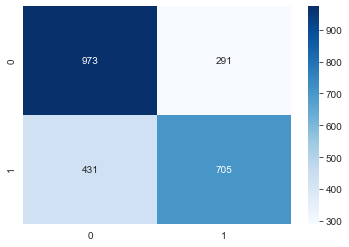

In [280]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='.6g',cmap='Blues')

0.7560428830896773


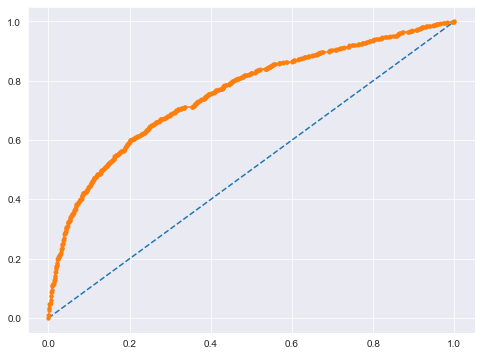

In [281]:
# tpr = tp/tp+fn;     fpr = fp/fp+tn

plt.figure(figsize=(8,6))
probs = lr.predict_proba(X_test)
# keep probabilty of positive only
probs = probs[:, 1]
# csalculation of roc curve

auc = roc_auc_score(y_test, probs)
print(auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(fpr, tpr, marker = '.')
plt.show()

## 4.3. Building Random Forest Model for Training Set

In [282]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [283]:
y_pred_rfc = rfc.predict(X_test)

In [284]:
rfc.score(X_train, y_train)

1.0

In [285]:
rfc.score(X_test, y_test)

0.7154166666666667

In [286]:
X_train.shape

(5600, 142)

In [287]:
# Lets do cross validation
from sklearn.model_selection import cross_val_score
rfc_score = cross_val_score(rfc, X_train, y_train, cv = 10)
rfc_mean = rfc_score.mean()
rfc_mean

0.7235714285714285

In [288]:
from pprint import pprint
print("Parameters currently in use:\n")
pprint(rfc.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [289]:
# from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

# param_dist = {"max_depth": [1,2,3,5,4,6,7,8,9, None],
#               "max_features":[1,2,3,5,4,6,7,8,9, None],
#               "min_samples_leaf": [1,2,3,5,4,6,7,8,9, None],
#               "criterion": ["gini", "entropy"],
#               "min_samples_split": [2, 5, 10]}

# #cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_dist,n_jobs = -1, cv = 10, scoring='accuracy', error_score= 0)
# grid_result = grid_search.fit(X, y)

In [290]:
#grid_result.best_params_

In [291]:
rft = RandomForestClassifier(criterion='gini', max_depth=None, max_features= 9, 
                                min_samples_leaf=2, min_samples_split= 2) # random forest_hyperparameteer tuning
rft.fit(X_train, y_train)

RandomForestClassifier(max_features=9, min_samples_leaf=2)

In [292]:
y_pred_rft = rft.predict(X_test)

In [293]:
rft.score(X_train, y_train)

0.8439285714285715

In [294]:
rft.score(X_test, y_test)

0.71875

## 4.4 Model Evaluation of Random Forest

In [295]:
# from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

acc = accuracy_score(y_test, y_pred_rft)*100
cm = confusion_matrix(y_test, y_pred_rft)

accuracies['Random Forest']=acc
print(acc)
print(cm)

71.875
[[1018  246]
 [ 429  707]]


<AxesSubplot:>

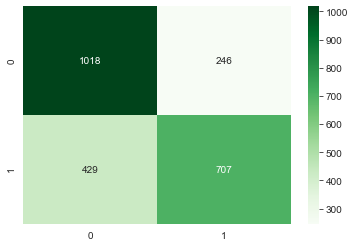

In [296]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt = '0.6g', cmap = 'Greens')

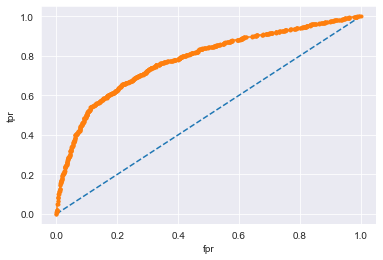

In [297]:
plt.figure(figsize=(6,4))
probs = rft.predict_proba(X_test)
# keep only positive probabilities

probs = probs[:, 1]
# calculate roc curve

fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '.')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

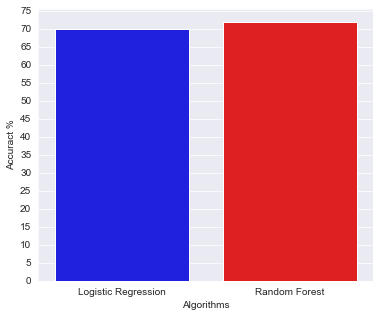

In [298]:
plt.figure(figsize=(6,5))
plt.yticks(np.arange(0,100,5))
plt.ylabel("Accuract %")
plt.xlabel("Algorithms")
colors = ["blue", "red"]
sns.barplot(x = list(accuracies.keys()), y = list(accuracies.values()), palette=colors)
plt.show()

<AxesSubplot:>

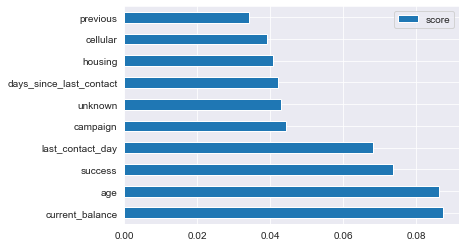

In [299]:
# lets see the best features

score = rft.feature_importances_
pd.DataFrame(score, index = X.columns, columns = ['score']).sort_values('score', ascending=False).head(10).plot.barh()

# Neural Network with Keras

In [300]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [301]:
# X_train = np.array(X_train)
# X_test = np.array(X_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)

In [302]:
print(X_train.shape)
print(y_train.shape)

(5600, 142)
(5600,)


In [303]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

y_train = np.asarray(y_train).astype(np.int).reshape((-1, 1))
y_test = np.asarray(y_test).astype(np.int).reshape((-1, 1))

In [304]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5600, 142) (5600, 1)
(2400, 142) (2400, 1)


In [305]:
#Define Sequential model with 3 layers
model = keras.Sequential()
model.add(layers.Dense(units = 250, activation="relu", input_dim=142))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(units = 150, activation="relu"))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(units = 150, activation="relu"))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units = 50, activation="relu"))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units = 1, activation="sigmoid"))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 250)               35750     
_________________________________________________________________
dropout_24 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 150)               37650     
_________________________________________________________________
dropout_25 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_26 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 50)               

In [306]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [307]:
model.fit(X_train, y_train, batch_size = 300, epochs=300, validation_data=(X_test, y_test), verbose = 2)

Epoch 1/300
19/19 - 1s - loss: 0.6895 - accuracy: 0.5621 - val_loss: 0.6358 - val_accuracy: 0.6496
Epoch 2/300
19/19 - 0s - loss: 0.6299 - accuracy: 0.6452 - val_loss: 0.6048 - val_accuracy: 0.6746
Epoch 3/300
19/19 - 0s - loss: 0.6089 - accuracy: 0.6645 - val_loss: 0.5964 - val_accuracy: 0.6850
Epoch 4/300
19/19 - 0s - loss: 0.5909 - accuracy: 0.6807 - val_loss: 0.5930 - val_accuracy: 0.6925
Epoch 5/300
19/19 - 0s - loss: 0.5814 - accuracy: 0.6880 - val_loss: 0.5927 - val_accuracy: 0.6908
Epoch 6/300
19/19 - 0s - loss: 0.5653 - accuracy: 0.7043 - val_loss: 0.5912 - val_accuracy: 0.6921
Epoch 7/300
19/19 - 0s - loss: 0.5578 - accuracy: 0.7218 - val_loss: 0.5917 - val_accuracy: 0.6917
Epoch 8/300
19/19 - 0s - loss: 0.5590 - accuracy: 0.7127 - val_loss: 0.5906 - val_accuracy: 0.6875
Epoch 9/300
19/19 - 0s - loss: 0.5442 - accuracy: 0.7268 - val_loss: 0.5905 - val_accuracy: 0.6908
Epoch 10/300
19/19 - 0s - loss: 0.5395 - accuracy: 0.7243 - val_loss: 0.5904 - val_accuracy: 0.6883
Epoch 11/

19/19 - 0s - loss: 0.1900 - accuracy: 0.9209 - val_loss: 1.1020 - val_accuracy: 0.6567
Epoch 84/300
19/19 - 0s - loss: 0.1911 - accuracy: 0.9209 - val_loss: 1.0690 - val_accuracy: 0.6583
Epoch 85/300
19/19 - 0s - loss: 0.1853 - accuracy: 0.9223 - val_loss: 1.0739 - val_accuracy: 0.6550
Epoch 86/300
19/19 - 0s - loss: 0.1854 - accuracy: 0.9254 - val_loss: 1.1256 - val_accuracy: 0.6558
Epoch 87/300
19/19 - 0s - loss: 0.1755 - accuracy: 0.9248 - val_loss: 1.1252 - val_accuracy: 0.6533
Epoch 88/300
19/19 - 0s - loss: 0.1704 - accuracy: 0.9307 - val_loss: 1.1438 - val_accuracy: 0.6471
Epoch 89/300
19/19 - 0s - loss: 0.1748 - accuracy: 0.9321 - val_loss: 1.1380 - val_accuracy: 0.6575
Epoch 90/300
19/19 - 0s - loss: 0.1712 - accuracy: 0.9270 - val_loss: 1.1544 - val_accuracy: 0.6575
Epoch 91/300
19/19 - 0s - loss: 0.1644 - accuracy: 0.9312 - val_loss: 1.1934 - val_accuracy: 0.6533
Epoch 92/300
19/19 - 0s - loss: 0.1829 - accuracy: 0.9245 - val_loss: 1.1210 - val_accuracy: 0.6604
Epoch 93/300


Epoch 165/300
19/19 - 0s - loss: 0.0995 - accuracy: 0.9621 - val_loss: 1.5741 - val_accuracy: 0.6458
Epoch 166/300
19/19 - 0s - loss: 0.1079 - accuracy: 0.9596 - val_loss: 1.5007 - val_accuracy: 0.6488
Epoch 167/300
19/19 - 0s - loss: 0.1008 - accuracy: 0.9616 - val_loss: 1.4705 - val_accuracy: 0.6438
Epoch 168/300
19/19 - 0s - loss: 0.0932 - accuracy: 0.9641 - val_loss: 1.5482 - val_accuracy: 0.6404
Epoch 169/300
19/19 - 0s - loss: 0.0968 - accuracy: 0.9629 - val_loss: 1.5524 - val_accuracy: 0.6425
Epoch 170/300
19/19 - 0s - loss: 0.0817 - accuracy: 0.9691 - val_loss: 1.6172 - val_accuracy: 0.6433
Epoch 171/300
19/19 - 0s - loss: 0.0866 - accuracy: 0.9650 - val_loss: 1.6518 - val_accuracy: 0.6488
Epoch 172/300
19/19 - 0s - loss: 0.0858 - accuracy: 0.9652 - val_loss: 1.6311 - val_accuracy: 0.6504
Epoch 173/300
19/19 - 0s - loss: 0.0964 - accuracy: 0.9670 - val_loss: 1.5839 - val_accuracy: 0.6579
Epoch 174/300
19/19 - 0s - loss: 0.0877 - accuracy: 0.9675 - val_loss: 1.5569 - val_accurac

19/19 - 0s - loss: 0.0714 - accuracy: 0.9721 - val_loss: 1.6976 - val_accuracy: 0.6521
Epoch 247/300
19/19 - 0s - loss: 0.0682 - accuracy: 0.9739 - val_loss: 1.7375 - val_accuracy: 0.6546
Epoch 248/300
19/19 - 0s - loss: 0.0558 - accuracy: 0.9791 - val_loss: 1.8386 - val_accuracy: 0.6521
Epoch 249/300
19/19 - 0s - loss: 0.0563 - accuracy: 0.9800 - val_loss: 1.8905 - val_accuracy: 0.6475
Epoch 250/300
19/19 - 0s - loss: 0.0620 - accuracy: 0.9782 - val_loss: 1.9053 - val_accuracy: 0.6450
Epoch 251/300
19/19 - 0s - loss: 0.0560 - accuracy: 0.9796 - val_loss: 1.9470 - val_accuracy: 0.6463
Epoch 252/300
19/19 - 0s - loss: 0.0683 - accuracy: 0.9746 - val_loss: 1.8728 - val_accuracy: 0.6525
Epoch 253/300
19/19 - 0s - loss: 0.0659 - accuracy: 0.9748 - val_loss: 1.7717 - val_accuracy: 0.6429
Epoch 254/300
19/19 - 0s - loss: 0.0711 - accuracy: 0.9743 - val_loss: 1.7443 - val_accuracy: 0.6492
Epoch 255/300
19/19 - 0s - loss: 0.0628 - accuracy: 0.9759 - val_loss: 1.7982 - val_accuracy: 0.6471
Epoc

In [308]:
y_pred = model.predict(X_test)

In [309]:
y_pred

array([[9.9999559e-01],
       [1.1153878e-06],
       [1.2624472e-02],
       ...,
       [3.5712123e-04],
       [1.0000000e+00],
       [9.9975705e-01]], dtype=float32)

In [310]:
for i in range(len(y_pred)):
    if y_pred[i] > 0.75:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [311]:
y_pred

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

In [312]:
y_test

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [313]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[909 355]
 [462 674]]


<AxesSubplot:>

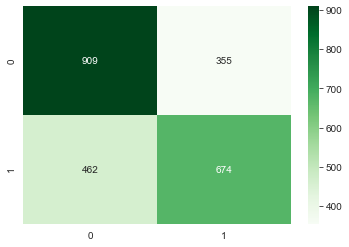

In [314]:
plt.figure()
sns.heatmap(cm, annot=True, fmt='0.6g', cmap = 'Greens')

In [315]:
results = model.evaluate(X_test, y_test, batch_size=128)

19/19 [==============================] - 0s 886us/step - loss: 1.8845 - accuracy: 0.6483


In [316]:
results

[1.884482979774475, 0.6483333110809326]